In [70]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
random_state = 42

## Get SemEval data

In [71]:
data_dir ="SemEval"
lng = 'Ar'
train_SemEval = pd.read_csv(data_dir+'/2018-E-c-'+lng+'-train.txt' ,sep = '\t')
eval_SemEval =  pd.read_csv(data_dir+'/2018-E-c-'+lng+'-dev.txt' ,sep = '\t')
test_SemEval =  pd.read_csv(data_dir+'/2018-E-c-'+lng+'-test-gold.txt' ,sep = '\t')

SemEval_data = pd.concat([train_SemEval,eval_SemEval,test_SemEval])
SemEval_data = SemEval_data.drop_duplicates(subset='Tweet')

# Mark "neutral" tweets
SemEval_data.reset_index(drop=True,inplace=True)
SemEval_data['neutral'] = (SemEval_data.sum(axis=1,numeric_only=True)==0).astype(float)

SemEval_data['text'] = SemEval_data['Tweet']
SemEval_data.drop(labels='Tweet',axis=1,inplace=True)
SemEval_data.info()
SemEval_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4381 non-null   object 
 1   anger         4381 non-null   int64  
 2   anticipation  4381 non-null   int64  
 3   disgust       4381 non-null   int64  
 4   fear          4381 non-null   int64  
 5   joy           4381 non-null   int64  
 6   love          4381 non-null   int64  
 7   optimism      4381 non-null   int64  
 8   pessimism     4381 non-null   int64  
 9   sadness       4381 non-null   int64  
 10  surprise      4381 non-null   int64  
 11  trust         4381 non-null   int64  
 12  neutral       4381 non-null   float64
 13  text          4381 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 479.3+ KB


,ID,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,neutral,text
0,2018-Ar-00259,1,0,0,1,0,0,0,1,1,0,0,0.0,ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت ف...
1,2018-Ar-02696,0,0,0,0,1,1,1,0,0,0,0,0.0,كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده ي...
2,2018-Ar-03596,0,0,0,0,0,1,1,0,0,0,0,0.0,البسطاء يمتلكون أرواح نادره جداتجدهم بمظهر متو...
3,2018-Ar-02999,0,0,0,1,0,0,0,0,0,0,0,0.0,مومعقول اللي قاعد يصير فيني هالايام يارب ماينت...
4,2018-Ar-02716,1,0,0,0,0,0,0,0,1,0,0,0.0,انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط ...


<AxesSubplot:>

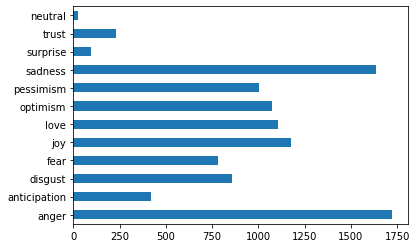

In [72]:
emotion_list = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
                'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'neutral']
SemEval_data[emotion_list].sum().plot(kind="barh")

## Extract more neutral Tweets from the BigArabicClassificationCorpus 

In [73]:
BACCorpus = pd.read_csv("BigArabicClassificationCorpus.csv")
BACCorpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94971 entries, 0 to 94970
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   text                      94971 non-null  object 
 1   sentiment                 31380 non-null  object 
 2   sorce                     73971 non-null  object 
 3   sentiment_classification  31405 non-null  object 
 4   sarcasm                   15548 non-null  object 
 5   main_post                 33572 non-null  object 
 6   dialect                   94971 non-null  object 
 7   valence_class             7400 non-null   object 
 8   valence_score             7400 non-null   float64
dtypes: float64(1), object(8)
memory usage: 6.5+ MB


/opt/anaconda3/envs/yotam-inf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**We take a heuristic assumption that the Natural-Sentimnet examples are similar to Natural-Emotion examples**

In [74]:
natural_instance = BACCorpus.loc[BACCorpus.sentiment=="neutral"].drop_duplicates(subset='text')
sample_size = 1500

natural_instance = natural_instance.sample(n=sample_size,random_state=random_state)
natural_instance['ID'] = (np.arange(len(natural_instance))).astype('str')
natural_instance['ID'] = 'Sent-' + natural_instance['ID']
natural_instance['neutral'] = 1.0
natural_instance = natural_instance[['ID', 'text','neutral']]
natural_instance

,ID,text,neutral
74485,Sent-0,"""عائدات بوكيمون جو مليوني دولار يومياًhttps://...",1.0
72940,Sent-1,"""للتوضيح دار المنى السويديه في صاله ٥ جناح٨٤ و...",1.0
71660,Sent-2,"""RT @sayidatystars: كيف رد #عاصي_الحلاني بعد ا...",1.0
65700,Sent-3,"""بعد اعتذاره عن حضور «نوبل» .. بوب ديلان في ال...",1.0
69975,Sent-4,"""شمعة الكترونية لمستخدمي أجهزة أبل https://t.c...",1.0
...,...,...,...
75023,Sent-1495,"""RT @alhumaidan110: #مسابقة_مصنع_الحميدانسؤال ...",1.0
68045,Sent-1496,هههههههههههههههههههههههههههههههههههههههههههههه...,1.0
74829,Sent-1497,"""لا اعلم كيف يؤمن المحاضرون بالندوة بالعلمانية...",1.0
63802,Sent-1498,#فههههههههههد_غشششششششاااااااام_الببببببصصصصصم...,1.0


## Merging the datasets

In [75]:
joint_df = pd.concat([SemEval_data,natural_instance])
joint_df = joint_df[['ID', 'text','anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
                    'optimism', 'pessimism', 'sadness', 'surprise', 'trust', 'neutral']]
joint_df.fillna(value=0,inplace=True)
joint_df.reset_index(drop=True,inplace=True)
joint_df

,ID,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,neutral
0,2018-Ar-00259,ظلينا نتكلم ساعات ساعات رتبت فيها نفسي وبكيت ف...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2018-Ar-02696,كل سنه وانتي بخير ياقلبي وكل سنه وانتي سعيده ي...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2018-Ar-03596,البسطاء يمتلكون أرواح نادره جداتجدهم بمظهر متو...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2018-Ar-02999,مومعقول اللي قاعد يصير فيني هالايام يارب ماينت...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-Ar-02716,انا اكثر شخص متناقض بداخلي حب وكره وامل وقنوط ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Sent-1495,"""RT @alhumaidan110: #مسابقة_مصنع_الحميدانسؤال ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5877,Sent-1496,هههههههههههههههههههههههههههههههههههههههههههههه...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5878,Sent-1497,"""لا اعلم كيف يؤمن المحاضرون بالندوة بالعلمانية...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5879,Sent-1498,#فههههههههههد_غشششششششاااااااام_الببببببصصصصصم...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
joint_df_12_labels = joint_df.copy()

### train_test_split

4998 883


<AxesSubplot:>

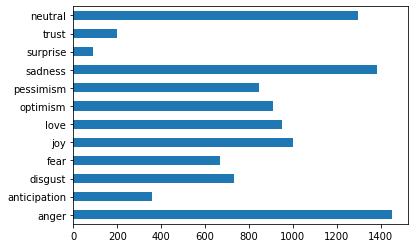

In [77]:
from sklearn.model_selection import train_test_split
train_12_labels, test_12_labels = train_test_split(joint_df_12_labels, test_size=0.15, random_state=random_state)
print(len(train_12_labels),len(test_12_labels))

train_12_labels.to_csv("train_12_labels.csv",index=False)
test_12_labels.to_csv("test_12_labels.csv",index=False)

train_12_labels[emotion_list].sum().plot(kind="barh")

## Join similar emotions
Cunck 12 labels to 6 labels

In [82]:
def Join_Emotions(data):
    df = data.copy()
    print("before: ",len(df))
    for i in df.index:
        if (df['optimism'][i] == 1) or (df['love'][i] == 1):
            df['joy'][i] = 1
        if df['pessimism'][i] == 1:
            df['sadness'][i] = 1
    df.drop(labels = ['optimism','love','pessimism','surprise','trust','anticipation'],axis = 1, inplace = True)
    df = df.loc[df.sum(axis=1,numeric_only=True)!=0]
    df.reset_index(drop=True,inplace=True)
    print("after: ",len(df))
    return df

before:  4998


<ipython-input-82-a7bc9d7de3a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sadness'][i] = 1
<ipython-input-82-a7bc9d7de3a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joy'][i] = 1


after:  4971
before:  883
after:  877


<AxesSubplot:>

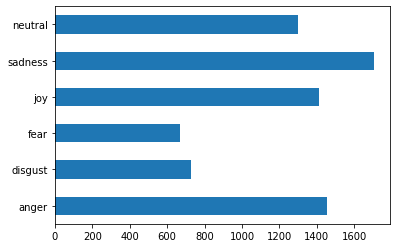

In [83]:
emotion_6_labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'neutral']

train_6_labels = Join_Emotions(train_12_labels)
test_6_labels = Join_Emotions(test_12_labels)

train_6_labels.to_csv("train_6_labels.csv",index=False)
test_6_labels.to_csv("test_6_labels.csv",index=False)

train_6_labels[emotion_6_labels].sum().plot(kind="barh")

In [85]:
test_12_labels

,ID,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,neutral
5371,Sent-990,"""#فتح : تم توجيه الدعوات لفصائل العمل الوطني ج...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5299,Sent-918,"""الشارع السياسى | بشار الأسد يتعهد باستعادة حل...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
199,2018-Ar-03792,دا كود شحن ب 60 جونيه بتاع الفرحة \n\n9226169...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3268,2018-Ar-02623,بتبصوا ليهه بشفقة ومالكوا متعاطفين أنا مش حزين...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3504,2018-Ar-00307,أبي قد تركتني وحيد في الدنيا قد تركتني أحتاج ل...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,2018-Ar-02149,ي رب إجعل نهاية هالهم فرح 😭 💙,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1172,2018-Ar-03001,• #الفرح سبب #الكآبة لأننا نصاب بالكآبة عندما ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5523,Sent-1142,"""محمد عساف .. زي فكرتي .. دخلوا #فلسطين مو تط...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4181,2018-Ar-00285,🔺 من المؤسف ان نجد حتى الآن #ادارة_الاتفاق تضع...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
